In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
df_donardetails = pd.read_excel('OrganDonor_Consolidated.xlsx')
opo_hospdetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='OPO_HospDetails')
dataframe_referraldetails = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='ReferralDetails')
df_yearlyoutcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Yearly_Outcomes')
dataframe_outcomes = pd.read_excel('OrganDonor_Consolidated.xlsx', sheet_name='Outcomes')



In [137]:
#Qu 16 -- How many donors were registered in each Organ Procurement Organization?

# Initialize an empty dictionary to store the donor counts for each OPO ID
opo_donor_count = {}
# Loop through the list of donor OPO IDs 
for opo in opo_hospdetails['OPO']:
    if opo in opo_donor_count:
        opo_donor_count[opo] += 1
    else:
        opo_donor_count[opo] = 1

# Display the count of donors for each OPO ID
for opo, count in opo_donor_count.items():
    print(f"{opo}: {count} donors")

OPO1: 32148 donors
OPO2: 16145 donors
OPO3: 12514 donors
OPO4: 33641 donors
OPO5: 15738 donors
OPO6: 22915 donors


In [138]:
#17 Calculate the average time between referral and procurement for each mechanism of death

# Merge df_donardetails and dataframe_referraldetails  
merged_data = pd.merge(dataframe_donardetails, dataframe_referraldetails, on='PatientID', how='inner')

# Calculate time difference (procurement - referral)
merged_data['Time Difference'] = (merged_data['time_procured'] - merged_data['time_referred']).dt.total_seconds() / 3600  # Time difference 

# Group by 'Mechanism of Death' and calculate average time difference
avg_time_diff = merged_data.groupby('mechanism_of_death')['Time Difference'].mean().reset_index()

# Print the result
print(avg_time_diff)


           mechanism_of_death  Time Difference
0                Asphyxiation       110.935700
1                Blunt Injury       107.066895
2              Cardiovascular       100.448968
3   Death from Natural Causes        63.550680
4                    Drowning       116.006417
5           Drug Intoxication       104.320918
6                  Electrical       111.511563
7              Gun Shot Wound        95.280820
8               Gunshot Wound        72.290249
9              Natural Causes       106.429103
10          None of the Above       101.138974
11          None of the above        54.616667
12                      Other        56.929167
13                    Seizure       100.839926
14                       Stab        96.541678
15                     Stroke        86.378084
16        Sudden Infant Death        95.613979
17                    Unknown    -97002.425227


In [139]:
#18 What % of all referrals are procured?

# Convert timestamps to datetime
dataframe_ReferralDetails['time_referred'] = pd.to_datetime(dataframe_ReferralDetails['time_referred'])
dataframe_ReferralDetails['time_procured'] = pd.to_datetime(dataframe_ReferralDetails['time_procured'])

# Count total referrals and procured referrals
total_referrals = dataframe_ReferralDetails['time_referred'].notna().sum()  # Count total referrals
procured_referrals = dataframe_ReferralDetails['time_procured'].notna().sum()  # Count procured referrals

procured_percentage = (procured_referrals / total_referrals) * 100
print(f"Percentage of referrals that are procured: {procured_percentage:.2f}%")    


Percentage of referrals that are procured: 7.17%


In [140]:
#19 Write a function to calculate the year of birth for each patient using year of referral as a base.

# Extracting relevant columns
df_age = df_donardetails['age']
referrals_year = dataframe_ReferralDetails['Referral_Year']

# Merging both dataframes 
df_merged = pd.merge(df_donardetails, dataframe_ReferralDetails[['Referral_Year', 'PatientID']], on='PatientID', how='left')

# Function to calculate birth year
def calculate_birth_year(age, referral_year):
   
    return referral_year - age

# Applying the function to calculate 'Birth_Year'
df_merged['Birth_Year'] = df_merged.apply(
    lambda row: calculate_birth_year(row['age'], row['Referral_Year']), axis=1)

# Printing the result
print(df_merged[['age', 'Referral_Year', 'Birth_Year']])


       age  Referral_Year  Birth_Year
0     57.0           2020      1963.0
1     45.0           2021      1976.0
2     40.0           2019      1979.0
3     39.0           2018      1979.0
4     42.0           2021      1979.0
...    ...            ...         ...
3516  54.0           2018      1964.0
3517  24.0           2018      1994.0
3518  77.0           2016      1939.0
3519  34.0           2017      1983.0
3520  33.0           2017      1984.0

[3521 rows x 3 columns]


In [142]:
#20 How many patients have died of sepsis following drowning incidents?

#  Filter the dataset for drowning incidents
drowning_data = df_donardetails[df_donardetails['mechanism_of_death'] == 'Drowning']

# Filter for cases where sepsis was the cause of death
sepsis_deaths = drowning_data[drowning_data['causeofdeath'] == 'Sepsis']

# Count the number of cases
sepsis_death_count = sepsis_deaths.shape[0]

# Output the result
print(f"Number of patients who died from sepsis following drowning incidents: {sepsis_death_count}")


Number of patients who died from sepsis following drowning incidents: 0


In [144]:
#21 What percentage of all procurements are actually transplanted?


# Count total procurements
total_procurements = len(dataframe_ReferralDetails)

# Count transplanted procurements
transplanted_procurements = dataframe_ReferralDetails[dataframe_ReferralDetails['transplanted'] == 1].shape[0]  # assuming 1 means transplanted

# Calculate the percentage
percentage_transplanted = (transplanted_procurements / total_procurements) * 100

print(f"Percentage of transplanted procurements: {percentage_transplanted:.2f}%")


Percentage of transplanted procurements: 6.74%


In [145]:
#22 What is the ratio of referrals to procurements per year?

# Count the number of referrals per year
referrals_count = dataframe_referraldetails.groupby('Referral_Year').size()

# Count the number of procurements per year
procurements_count = dataframe_referraldetails.groupby('Procured_Year').size()

# Create a new DataFrame to combine both counts
yearly_data = pd.DataFrame({
    'Referrals': referrals_count,
    'Procurements': procurements_count
})

# Fill missing values with 0 
yearly_data = yearly_data.fillna(0)

# Calculate the ratio of referrals to procurements
yearly_data['Referral_to_Procurement_Ratio'] = yearly_data['Referrals'] / yearly_data['Procurements']

# Display the result
print(yearly_data)



        Referrals  Procurements  Referral_to_Procurement_Ratio
1987.0        0.0             2                       0.000000
2015.0    12910.0          1027                      12.570594
2016.0    12840.0          1070                      12.000000
2017.0    14583.0          1143                      12.758530
2018.0    19175.0          1337                      14.341810
2019.0    20927.0          1637                      12.783751
2020.0    24996.0          1649                      15.158278
2021.0    27670.0          1670                      16.568862
2022.0        0.0             8                       0.000000


In [146]:
# 23 --How many referrals occurred in 2018?

referrals_2018 = dataframe_referraldetails[dataframe_referraldetails['Referral_Year'] == 2018].shape[0]
print(f"Number of referrals in 2018: {referrals_2018}")


Number of referrals in 2018: 19175


In [147]:
#24 Which hospital had the lowest rate of lung transplants? Procured but not transplanted

# Merging  dataframes 
df_merged = pd.merge(dataframe_outcomes,opo_hospdetails,on='PatientID',how='inner')

df_merged['lung_left_transplanted'] = df_merged['outcome_lung_left'].notna()
df_merged['lung_right_transplanted'] = df_merged['outcome_lung_right'].notna()

# Mark rows where either the left or right lung is transplanted
df_merged['lung_transplanted'] = df_merged['lung_left_transplanted'] | df_merged['lung_right_transplanted']

# Count how many lungs were procured but not transplanted (group by hospital)
# A lung is considered procured but not transplanted if it's not transplanted 
hospital_summary = df_merged.groupby('HospitalID').agg(
    lungs_procured=('PatientID', 'count'),  # Total lungs procured (i.e., total rows per hospital)
    lungs_transplanted=('lung_transplanted', 'sum')  # Total number of transplanted lungs
)

# Calculate the number of lungs procured but not transplanted
hospital_summary['lungs_procured_but_not_transplanted'] = hospital_summary['lungs_procured'] - hospital_summary['lungs_transplanted']

# Calculate the rate of procured but not transplanted lungs
hospital_summary['procured_but_not_transplanted_rate'] = hospital_summary['lungs_procured_but_not_transplanted'] / hospital_summary['lungs_procured']

# Identify the hospital with the lowest rate
lowest_rate_hospital = hospital_summary.loc[hospital_summary['procured_but_not_transplanted_rate'].idxmin()]

# Display the hospital with the lowest procured but not transplanted rate
print("Hospital with the lowest rate of procured but not transplanted lungs:")
print(lowest_rate_hospital)



Hospital with the lowest rate of procured but not transplanted lungs:
lungs_procured                         1.0
lungs_transplanted                     1.0
lungs_procured_but_not_transplanted    0.0
procured_but_not_transplanted_rate     0.0
Name: OPO1_H15524, dtype: float64


In [148]:
#25 In donors where brain death occurred, what was the time difference between brain death and asystole?
 
# handling invalid formats
df_donardetails['time_brain_death'] = pd.to_datetime(df_donardetails['time_brain_death'], errors='coerce')
df_donardetails['time_asystole'] = pd.to_datetime(df_donardetails['time_asystole'], errors='coerce')

# Dropping rows where 'time_asystole' or 'time_brain_death' is missing
df_donardetails = df_donardetails.dropna(subset=['time_asystole', 'time_brain_death'])

# Calculate the time difference
df_donardetails['time_diff'] = df_donardetails.apply(
    lambda row: row['time_asystole'] - row['time_brain_death'] if row['brain_death'] else pd.NaT,
    axis=1
)
# Output the result
print(df_donardetails[['brain_death', 'time_brain_death', 'time_asystole', 'time_diff']])


        brain_death    time_brain_death       time_asystole       time_diff
114               1 2034-07-14 18:07:00 2034-07-15 14:15:00 0 days 20:08:00
135               1 2037-01-07 11:45:00 2037-01-08 08:20:00 0 days 20:35:00
154               1 2035-01-04 15:59:00 2035-01-04 23:36:00 0 days 07:37:00
159               1 2033-10-30 09:00:00 2033-10-30 18:15:00 0 days 09:15:00
239               1 2037-09-06 18:35:00 2037-09-09 15:44:00 2 days 21:09:00
...             ...                 ...                 ...             ...
129973            1 2033-06-07 19:20:00 2033-06-10 00:13:00 2 days 04:53:00
130627            1 2034-01-21 16:02:00 2034-01-21 16:02:00 0 days 00:00:00
131195            1 2031-05-14 21:01:00 2031-05-14 23:00:00 0 days 01:59:00
131656            1 2033-04-12 15:07:00 2033-04-13 06:45:00 0 days 15:38:00
132866            1 2032-05-15 16:47:00 2032-05-15 16:47:00 0 days 00:00:00

[3521 rows x 4 columns]


In [149]:
#26 Which OPO recorded the highest calculated deaths in the year 2015?

# Filter the data for the year 2015
df_2015 = df_yearlyoutcomes [df_yearlyoutcomes ['Year'] == 2015]

# Find the OPO with the highest number of recorded deaths
highest_deaths = df_2015.loc[df_2015['mean calc deaths'].idxmax()]

# Output the OPO with the highest recorded deaths in 2015
print(f"The OPO with the highest calculated deaths in 2015 is {highest_deaths['OPO']} with {highest_deaths['mean calc deaths']} deaths.")

The OPO with the highest calculated deaths in 2015 is OPO4 with 3074.575 deaths.


In [150]:
#27 Create a pivot table shows organ-based outcome type as rows and outcome statuses as columns

# Melt the DataFrame to long format
df_pivot_data = pd.melt(dataframe_outcomes, id_vars=['PatientID'], value_vars=['outcome_heart', 'outcome_liver', 'outcome_kidney_left', 
                                                          'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right', 
                                                          'outcome_intestine', 'outcome_pancreas'],
                    var_name='organ_based_outcome_type', value_name='outcome_status')

# Create the pivot table
pivot_table = pd.pivot_table(df_pivot_data, 
                             index='organ_based_outcome_type', 
                             columns='outcome_status', 
                             aggfunc='size', 
                             fill_value=0)

# Display the pivot table
print(pivot_table)



outcome_status            Recovered for Research  \
organ_based_outcome_type                           
outcome_heart                                682   
outcome_intestine                            279   
outcome_kidney_left                          466   
outcome_kidney_right                         459   
outcome_liver                                533   
outcome_lung_left                           1182   
outcome_lung_right                          1246   
outcome_pancreas                             627   

outcome_status            Recovered for Transplant but not Transplanted  \
organ_based_outcome_type                                                  
outcome_heart                                                        21   
outcome_intestine                                                     4   
outcome_kidney_left                                                1252   
outcome_kidney_right                                               1300   
outcome_liver                

In [151]:
#29 How many deaths were registered with OPO 1? List them by year.

#Check for OPO1
df_OPO1 =  df_yearlyoutcomes[df_yearlyoutcomes['OPO'] == 'OPO1']
print(df_OPO1)


     OPO  Year  mean calc deaths
30  OPO1  2015           2852.69
31  OPO1  2016           2954.13
32  OPO1  2017           3112.34
33  OPO1  2018           3019.04
34  OPO1  2019           3148.80
35  OPO1  2020           3236.50


In [152]:
#31 How many donors with a successful transplant died of a seizure?

# Merge dataframe_donardetails and dataframe_referraldetails 
merged_data = pd.merge(dataframe_donardetails, dataframe_referraldetails, on='PatientID', how='inner')

#Filter the merged DataFrame for successful transplants and cause of death 'Seizure'
successful_donors = merged_data[(merged_data['causeofdeath'] == 'Seizure') & (merged_data['transplanted'] == 1)]

# Count how many donors died of seizures after a successful transplant
num_donors_with_seizure = successful_donors.shape[0]

# Output the result
print(f"Number of donors with a successful transplant who died of a seizure: {num_donors_with_seizure}")



Number of donors with a successful transplant who died of a seizure: 3


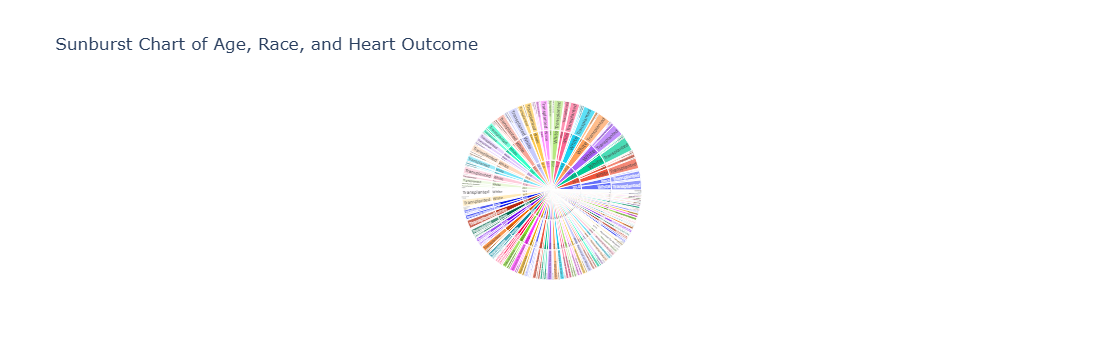

In [156]:
#32 Create a sunburst chart of age, race and any one outcome

# Merge the dataframes based on the 'PatientID' column
merged_data = pd.merge(df_donardetails, dataframe_outcomes, on='PatientID', how='inner')

# Drop rows with missing values in 'age', 'race', or 'outcome_heart'
merged_data_clean = merged_data.dropna(subset=['age', 'race', 'outcome_heart'])

# Group the data by age, race, and outcome_heart, then count the occurrences
grouped_data = merged_data_clean.groupby(['age', 'race', 'outcome_heart']).size().reset_index(name='count')


# Create the sunburst chart
sunburst = px.sunburst(grouped_data, path=['age', 'race', 'outcome_heart'], values='count',
                  title="Sunburst Chart of Age, Race, and Heart Outcome")

# Show the chart
sunburst.show()
